**Reading Dataset**

Dataset link https://www.kaggle.com/datasets/salikhussaini49/prediction-of-sepsis/

In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import pandas as pd
dataSepsis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sepsis/Dataset.csv", sep=",")

import pandas as pd

 In this line, we're importing a Python library called "pandas" and giving it the nickname "pd" to make it easier to use. Pandas is a library that helps us work with data, similar to how you might use a spreadsheet program

 dataSepsis = pd.read_csv("/content/Dataset.csv", sep=",")

we're using pandas to read a CSV (Comma-Separated Values) file named "Dataset.csv" located at the "/content/" path. We read the data and store it in a variable called "dataSepsis." The sep="," part tells pandas that the values in the CSV file are separated by commas. So, it's like opening a data table from a CSV file and putting it in a variable called "dataSepsis." This variable will hold the data we want to work with in the rest of our program.

In [220]:
dataSepsis.head(5)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [221]:
dataSepsis.shape

(1552210, 44)

In [222]:
dataSepsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

**Clean Dataset**

In [223]:
import numpy as np
from matplotlib import pyplot as plt

In [224]:
# Check for any null values

dataSepsis.isnull().sum()

Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           

In [225]:
dataSepsis.nunique()

Unnamed: 0            336
Hour                  336
HR                    343
O2Sat                 145
Temp                  641
SBP                   990
MAP                   945
DBP                   678
Resp                  235
EtCO2                 139
BaseExcess            407
HCO3                  304
FiO2                  104
pH                    103
PaCO2                 551
SaO2                  432
AST                  2025
BUN                   265
Alkalinephos          752
Calcium               549
Chloride              108
Creatinine           1407
Bilirubin_direct      280
Glucose              1157
Lactate              1340
Magnesium             110
Phosphate             193
Potassium             402
Bilirubin_total       407
TroponinI            2423
Hct                   725
Hgb                   340
PTT                  1410
WBC                   891
Fibrinogen            823
Platelets             989
Age                  5987
Gender                  2
Unit1       

In [226]:
# list of all the unique patients
# total number of patients present in the dataset

patients = list(dataSepsis['Patient_ID'].unique())
len(patients)

40336

In [227]:
dataSepsis['Unit'] = dataSepsis['Unit1'].add(dataSepsis['Unit2'], fill_value=0)
dataSepsis.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072,NaN
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072,NaN
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072,NaN
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072,NaN
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072,NaN


<Axes: >

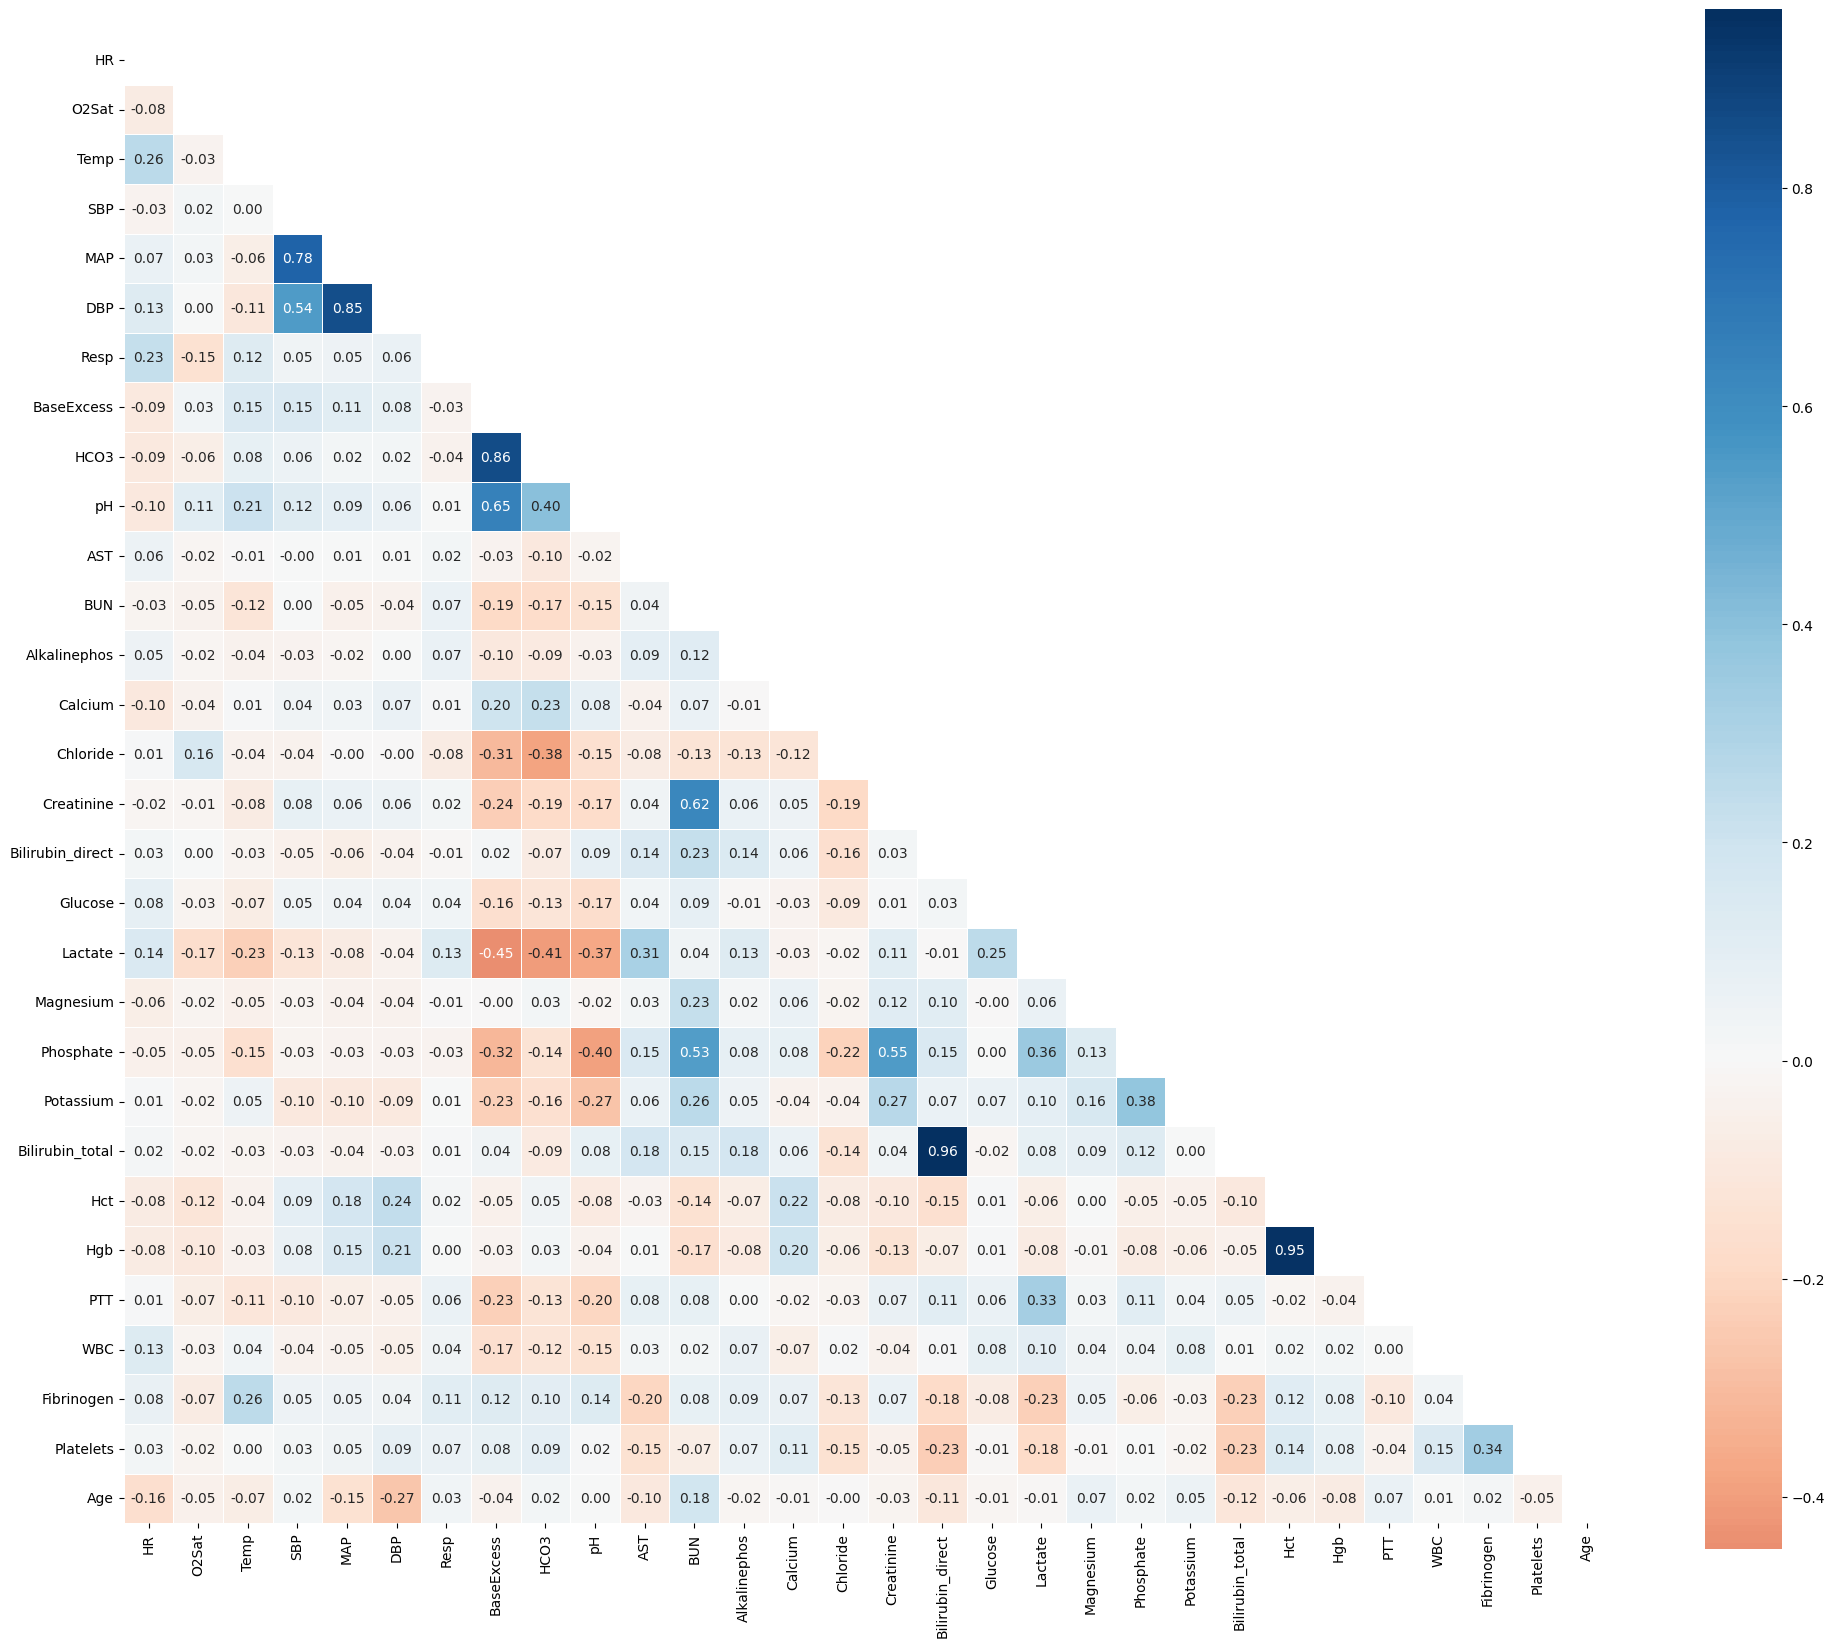

In [228]:
import seaborn as sns
correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = dataSepsis[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(24,20))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [229]:
columns_drop={'Unnamed: 0','SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','Alkalinephos', 'Calcium','Magnesium',
'Phosphate','Potassium','PTT','Fibrinogen','Bilirubin_direct','Hct','Unit1','Unit2'}
# Explanation: In this line, we define a set named "columns_drop" that contains the names of columns you
# want to remove from the "dataSepsis" dataset. These columns are no longer needed for your analysis, so
# you're preparing to drop them from the dataset.

dataSepsis.drop(columns=columns_drop, inplace=True)
# Explanation: This line removes the columns listed in the "columns_drop" set from the "dataSepsis" dataset.
# The columns parameter specifies which columns to drop, and inplace=True means the changes should be
# made directly to the "dataSepsis" dataset, without the need to create a new dataset. After running
# this line, the specified columns will be removed from the dataset.

dataSepsis.head()
# Explanation: After dropping the specified columns, this line displays the first few rows of the updated
# "dataSepsis" dataset using the .head() function. It helps you verify that the columns you wanted to
# remove have indeed been dropped, and you can inspect the modified dataset.

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,1,0,17072,NaN
1,1,65.0,100.0,NaN,72.0,16.5,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,2,0,17072,NaN
2,2,78.0,100.0,NaN,42.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,3,0,17072,NaN
3,3,73.0,100.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,68.54,0,-0.02,4,0,17072,NaN
4,4,70.0,100.0,NaN,74.0,14.0,0.4,NaN,NaN,NaN,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,NaN


In [230]:
dataSepsis.fillna(0, inplace=True)
# Explanation: In this line, we are filling any missing values (NaN) in the "dataSepsis" dataset with the
# value 0. The fillna function is used for this purpose. The inplace=True parameter means that the changes
# should be applied directly to the "dataSepsis" dataset.

dataSepsis.head(100)
# Explanation: After filling the missing values, this line displays the first 100 rows of the modified
# "dataSepsis" dataset using the .head(100) function. This helps you inspect the dataset and ensure that
# any missing values have been replaced with 0. It's a way to verify and explore the data after the
# filling operation.

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit
0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,1,0,17072,0.0
1,1,65.0,100.0,0.0,72.00,16.5,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,2,0,17072,0.0
2,2,78.0,100.0,0.0,42.50,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,3,0,17072,0.0
3,3,73.0,100.0,0.0,0.00,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,68.54,0,-0.02,4,0,17072,0.0
4,4,70.0,100.0,0.0,74.00,14.0,0.4,0.0,0.0,0.0,...,9.5,11.3,330.0,68.54,0,-0.02,5,0,17072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,1,0,9891,1.0
96,1,119.0,98.0,0.0,87.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,2,0,9891,1.0
97,2,120.0,97.0,0.0,95.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,3,0,9891,1.0
98,3,116.0,97.0,36.0,84.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,58.18,0,-2.43,4,0,9891,1.0


In [231]:
# Identified duplicates in the dataset

duplicated = dataSepsis[dataSepsis.duplicated(keep=False)]
# Explanation: In this line, you are identifying and selecting rows in the "dataSepsis" dataset that are
# exact duplicates. The duplicated function checks for duplicates, and keep=False ensures that all
# instances of duplicates are included in the selection. The duplicated rows are stored in a new variable
# named "duplicated."

duplicated.head()
# Explanation: After identifying duplicate rows and storing them in the "duplicated" variable, this line
# displays the first few rows of these duplicate entries using the .head() function. It allows you to see
# the duplicated rows in your dataset, helping you identify and potentially remove any redundant data.

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,PaCO2,SaO2,AST,...,Hgb,WBC,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,Unit


**Check Outliers**

In [232]:
# Determining Heart rate in the range of 10 and 200
target_dataSepsis = dataSepsis [(dataSepsis['HR'] >= 200) & (dataSepsis['HR'] <= 10 )]
# Explanation: In this line, you are creating a new dataset named "target_dataSepsis." You select rows
# from the "dataSepsis" dataset where the "HR" (Heart Rate) values are both greater than or equal to 200
# and less than or equal to 10. This code helps you identify instances where heart rates are outside the
# expected range and could potentially be erroneous.

target_dataSepsis.shape
# Explanation: After creating the "target_dataSepsis" dataset, this line checks its shape to see how many
# rows and columns it contains. It's a way to understand how many instances of heart rates outside the
# expected range were found in the dataset.

(0, 27)

In [233]:
# Determining Temperature in the range of 20 and 40
target_dataSepsis = dataSepsis [(dataSepsis['Temp'] >= 40) & (dataSepsis['Temp'] <= 20 )]
# Explanation: In this line, you are creating a new dataset named "target_dataSepsis." You select rows
# from the "dataSepsis" dataset where the "Temp" (temperature) values are both greater than or equal to
# 40 and less than or equal to 20. This code helps you identify instances where temperature values are
# outside the expected range, potentially indicating data quality issues.

target_dataSepsis.shape
# Explanation: After creating the "target_dataSepsis" dataset, this line checks its shape to see how many
# rows and columns it contains. It's a way to understand how many instances of temperature values outside
# the expected range were found in the dataset.

(0, 27)

In [234]:
# Group the data by patient ID and calculate mean, min, max, and std for each column
grouped_data = dataSepsis.groupby(['Patient_ID']).agg({'Hour': 'mean',
                                                       'HR': ['mean', 'min', 'max', 'std'],
                                                       'O2Sat': ['mean', 'min', 'max', 'std'],
                                                       'Temp': ['mean', 'min', 'max', 'std'],
                                                       'MAP': ['mean', 'min', 'max', 'std'],
                                                       'Resp': ['mean', 'min', 'max', 'std'],
                                                       'PaCO2': ['mean', 'min', 'max', 'std'],
                                                        'FiO2': ['mean', 'min', 'max', 'std'],
                                                       'SaO2': ['mean', 'min', 'max', 'std'],
                                                       'AST': ['mean', 'min', 'max', 'std'],
                                                        'BUN': ['mean', 'min', 'max', 'std'],
                                                       'Creatinine': ['mean', 'min', 'max', 'std'],
                                                       'Glucose': ['mean', 'min', 'max', 'std'],
                                                       'Hgb': ['mean', 'min', 'max', 'std'],
                                                       'WBC': ['mean', 'min', 'max', 'std'],
                                                       'Platelets': ['mean', 'min', 'max', 'std'],
                                                       'Bilirubin_total': ['mean', 'min', 'max', 'std'],
                                                        'Age': 'mean',
                                                       'Gender': 'first',
                                                       'HospAdmTime': 'first',
                                                       'ICULOS': 'max',
                                                       'SepsisLabel': 'max',
                                                       'Unit': 'first'})
# Explanation: In this line, you are using the "groupby" function to group your data by the "Patient_ID"
# column. Then, the "agg" function is used to apply various aggregation functions to each group. You're
# calculating the mean, minimum, maximum, and standard deviation for multiple columns in your dataset,
# such as heart rate (HR), oxygen saturation (O2Sat), temperature (Temp), and many others.

# Flatten the column names of the resulting DataFrame
grouped_data.columns = ["_".join(x) for x in grouped_data.columns.ravel()]
# Explanation: In this line, you are updating the column names of the "grouped_data" DataFrame. You are
# using a list comprehension to join the multi-level column names (which were created by the aggregation)
# into a single string format with underscores, making the column names more concise and easier to work with.

# Reset the index to have 'Patient_ID' as a separate column
grouped_data = grouped_data.reset_index()
# Explanation: In this line, you are resetting the index of the "grouped_data" DataFrame, which will
# convert the "Patient_ID" back into a regular column. This change is often made to prepare the data for
# export or further analysis.

output_file_path = r'aggregated_data.csv'
# Write the aggregated data to a new CSV file
grouped_data.to_csv(output_file_path, index=False)
# output_file_path = r'/content/aggregated_data.csv': This line defines the file path where you want to
# save the aggregated data in a CSV file. You should modify this path to match your file location.
# grouped_data.to_csv(output_file_path, index=False): Here, you are using the "to_csv" function to save
# the "grouped_data" DataFrame to a CSV file at the specified "output_file_path." The index=False argument
# ensures that the DataFrame's index is not included in the CSV file. The resulting file will contain
# the aggregated data for further analysis or reporting.